## Pipeline for extracting the fairy tales automatically
- Starting with the .txt file


In [2]:
!pip install bs4

   ---------------------------------------- 0.0/147.9 kB ? eta -:--:--
   -------- ------------------------------- 30.7/147.9 kB 1.3 MB/s eta 0:00:01
   -------------------------------------- - 143.4/147.9 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 147.9/147.9 kB 2.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\frede\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
!pip install re

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\frede\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## This is the loop for extracting the fairytales
- They are being separated by the number next to the headline
- The headline is then used as the title for the file

- These are currently the reference tales from Margaret Hunt

In [3]:
import os
import re


input_file = "inputdir"
output_folder = "outputdir"

os.makedirs(output_folder, exist_ok=True)


with open(input_file, 'r', encoding='utf-8') as file:
    text = file.read()


matches = re.finditer(r'(\d+\s+[^\n]+)\n(.*?)(?=\n\d+\s+[^\n]+|$)', text, re.DOTALL)

for match in matches:
    header = match.group(1).strip() #match title
    content = match.group(2).strip()  # Story content (everything until the next header)

    # Extract the number and title
    number, title = re.match(r'(\d+)\s+(.+)', header).groups()
    sanitized_title = title.replace(" ", "_").replace("/", "_")[:30]  # Shorten title

     # Save to file
    output_path = os.path.join(output_folder, f"{number}_{sanitized_title}.txt")
    with open(output_path, 'w', encoding='utf-8') as output_file:
        output_file.write(content)

print(f"Stories successfully extracted to: {os.path.abspath(output_folder)}")


Stories successfully extracted to: C:\Users\frede\OneDrive\Uni\Master\Semester 1\Natural Language Processing\Exam\Data\ext_2


## Next up: The original ones

#### Part 1

##### Pre-processing of the German files 

In [ ]:
#first up, we have to modify our txt files, as they contain some very quirky characters:
import os


input_file = "inpu_dir"
cleaned_file = "output_dir"  # Path for cleaned output

with open(input_file, 'r', encoding='utf-8') as file:
    text = file.read()


text = text.replace('ſ', 's')  # Replace old long 's'
text = text.replace('uͤ', 'ü').replace('oͤ', 'ö').replace('aͤ', 'ä')
text = text.replace('Uͤ', 'Ü').replace('Oͤ', 'Ö').replace('Aͤ', 'Ä')

with open(cleaned_file, 'w', encoding='utf-8') as file:
    file.write(text)

print(f"Cleaned text saved to: {os.path.abspath(cleaned_file)}")



In [ ]:
#now we are removing these weird artefacts [2/4800], cause I forgot
import os
import re

cleaned_file = "input"
output_folder = "output"

os.makedirs(output_folder, exist_ok=True)
with open(cleaned_file, 'r', encoding='utf-8') as file:
    text = file.read()


text = re.sub(r'\[\d+/\d+\]', '', text)

# Match stories based on the new structure
# and capture the number, title, and story content
matches = re.finditer(
    r'(\d+)\.\n([^\n]+)\.\n(.*?)(?=\n\d+\.\n[^\n]+\.\n|$)',
    text,
    re.DOTALL
)

# Process each match
for match in matches:
    number = match.group(1).strip()  # Story number
    title = match.group(2).strip()  # Story title
    content = match.group(3).strip()  # Story content

    # new fileeee name
    sanitized_title = title.replace(" ", "_").replace("/", "_")[:30]  # Shorten title

    output_path = os.path.join(output_folder, f"{number}_{sanitized_title}.txt")
    with open(output_path, 'w', encoding='utf-8') as output_file:
        output_file.write(content)

print(f"German stories successfully extracted to: {os.path.abspath(output_folder)}")


#### Now for part 2

##### Also for the German files --> They come in two parts

In [ ]:
#first up, we have to modify our txt files, as they contain some very quirky characters:
import os

input_file = "in"
cleaned_file = "out"

with open(input_file, 'r', encoding='utf-8') as file:
    text = file.read()

text = text.replace('ſ', 's')  # Replace old long 's'
text = text.replace('uͤ', 'ü').replace('oͤ', 'ö').replace('aͤ', 'ä')  # Replace small umlauts
text = text.replace('Uͤ', 'Ü').replace('Oͤ', 'Ö').replace('Aͤ', 'Ä')  # Replace capital umlauts

with open(cleaned_file, 'w', encoding='utf-8') as file:
    file.write(text)

print(f"Cleaned text saved to: {os.path.abspath(cleaned_file)}")

In [ ]:
import os
import re

cleaned_file = "in"
output_folder = "outttt"

os.makedirs(output_folder, exist_ok=True)

with open(cleaned_file, 'r', encoding='utf-8') as file:
    text = file.read()

# Remove unwanted artifacts like "[4/0038]"
text = re.sub(r'\[\d+/\d+\]', '', text)

# Match stories based on the new structure
matches = re.finditer(
    r'(\d+)\.\n([^\n]+)\.\n(.*?)(?=\n\d+\.\n[^\n]+\.\n|$)',
    text,
    re.DOTALL
)

for match in matches:
    number = match.group(1).strip()  # Story number
    title = match.group(2).strip()  # Story title
    content = match.group(3).strip()  # Story content

    sanitized_title = title.replace(" ", "_").replace("/", "_")[:30]  # Shorten title

    output_path = os.path.join(output_folder, f"{number}_{sanitized_title}.txt")
    with open(output_path, 'w', encoding='utf-8') as output_file:
        output_file.write(content)

print(f"German stories successfully extracted to: {os.path.abspath(output_folder)}")


### Jack Zipes Translations
- But its PDF

- *The struggle was to only extract the main text and not the headers/footers*

In [1]:
!pip install PyPDF2
!pip install  pdfplumber



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\frede\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\frede\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [13]:
!pip install matplotlib

     ---------------------------------------- 0.0/167.9 kB ? eta -:--:--
     ------------------- ------------------- 81.9/167.9 kB 2.3 MB/s eta 0:00:01
     -------------------------------------  163.8/167.9 kB 2.4 MB/s eta 0:00:01
     -------------------------------------- 167.9/167.9 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB ? eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.4/7.8 MB 13.5 MB/s eta 0:00:01
   ---- ----------------------------------- 0.9/7.8 MB 11.9 MB/s eta 0:00:01
   ------- -------------------------------- 1.5/7.8 MB 12.0 MB/s eta 0:00:01
   --------- ------------------------------ 2.0/7.8 MB 11.3 MB/s eta 0:00:01
   ------------ --------------------------- 2.5/7.8 MB 11.4 MB/s eta 0:00:01
   --------------- ------------------------ 3.0/7.8 MB 11.8 MB/s eta 0:00:01
   --------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\frede\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### We are inspecting the pages to hopefully exclude the footers in the process
- looking at the bounds of the text box and specifying that in the code

AttributeError: 'PageImage' object has no attribute 'plot'

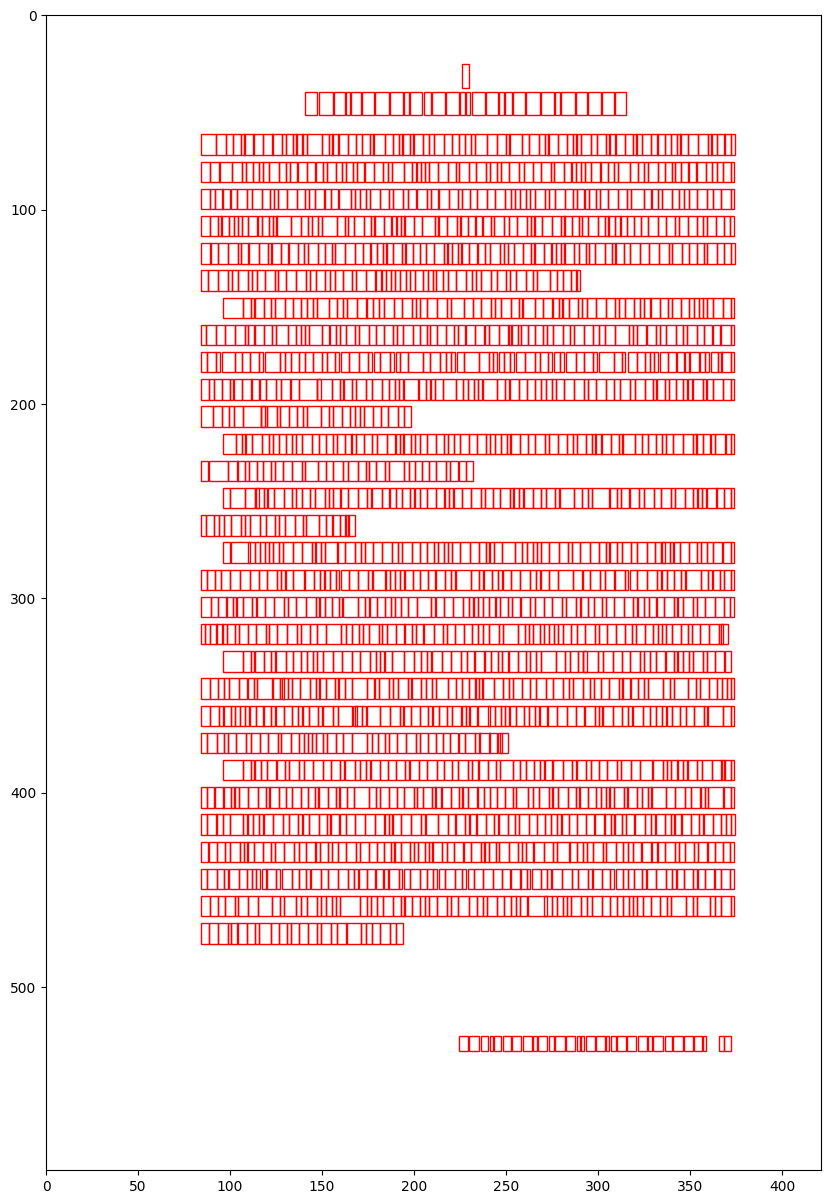

In [14]:
import pdfplumber
import matplotlib.pyplot as plt

pdf_path = "path"

with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[0]
    
    # Extract all characters on the page
    characters = page.chars
    
    # this is plotting the page and the text as small boxes to look at where it is
    fig, ax = plt.subplots(figsize=(10, 15))
    ax.set_xlim(0, page.width)
    ax.set_ylim(0, page.height)
    ax.invert_yaxis()  # Invert y-axis to match PDF coordinate system
    
    # Draw bounding boxes for all text regions
    for char in characters:
        x0, top, x1, bottom = char["x0"], char["top"], char["x1"], char["bottom"]
        ax.add_patch(plt.Rectangle((x0, top), x1 - x0, bottom - top, edgecolor="red", facecolor="none"))
    
    # Show the page image (optional)
    page_image = page.to_image()
    page_image.plot(ax=ax)
    
    plt.show()


#### Extraction of the PDF
- Now we can use the boundaries to match the main text box

In [17]:
import re
import os


input_file = "in"
output_dir = "out"

os.makedirs(output_dir, exist_ok=True)

with open(input_file, "r", encoding="utf-8") as file:
    text = file.read()

pattern = r"^\d+\s+([^\n]+)"  # thats how i extracted my stories

matches = list(re.finditer(pattern, text, re.MULTILINE))

for i, match in enumerate(matches):
    start_idx = match.end()  # Start of the current story text
    title = match.group(1).strip()  # Extracted story title

    filename = re.sub(r"\s+", "_", title.lower()) + ".txt"

    # Determine the end of the story by finding the start of the next match, smart if we dont have clear boundaries
    end_idx = matches[i + 1].start() if i + 1 < len(matches) else len(text)
    story_text = text[start_idx:end_idx].strip()

    output_path = os.path.join(output_dir, filename)
    with open(output_path, "w", encoding="utf-8") as story_file:
        story_file.write(story_text)

    print(f"Saved: {output_path}")

print(f"All stories have been split and saved to '{output_dir}'.")


Saved: split_stories\the_frog_king,_or_iron_henry.txt
Saved: split_stories\the_companionship_of_the_cat_and_mouse.txt
Saved: split_stories\the_virgin_mary’s_child.txt
Saved: split_stories\good_bowling_and_card_playing.txt
Saved: split_stories\the_wolf_and_the_seven_kids.txt
Saved: split_stories\the_nightingale_and_the_blindworm.txt
Saved: split_stories\the_stolen_pennies.txt
Saved: split_stories\the_hand_with_the_knife.txt
Saved: split_stories\the_twelve_brothers.txt
Saved: split_stories\riffraff.txt
Saved: split_stories\little_brother_and_little_sister.txt
Saved: split_stories\rapunzel.txt
Saved: split_stories\the_three_little_men_in_the_forest.txt
Saved: split_stories\nasty_flax_spinning.txt
Saved: split_stories\hansel_and_gretel.txt
Saved: split_stories\herr_fix-_it-_up.txt
Saved: split_stories\the_white_snake.txt
Saved: split_stories\the_journey_of_the_straw,.txt
Saved: split_stories\the_fisherman_and_his_wife.txt
Saved: split_stories\a_story_about_a_brave_tailor.txt
Saved: split_s

### Indexing Zipes story
- This god awful stuff took me hours and is probably mentioned in one sentence in the paper :')


- We need to align the files with the MH files for the translation process. they need to have the same number, so I can make a loop that just matches the file prefixes

In [30]:
!pip install fuzzywuzzy




[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\frede\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [31]:
import os
import re
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

reference_dir = "in"
unaligned_dir = "un" #the ones that are chaotic
output_dir = "aligned_en"
os.makedirs(output_dir, exist_ok=True)

def extract_title(filename):
    # For reference files, extract title after the index (e.g., "1_the_frog" -> "the_frog")
    return re.sub(r"^\d+_", "", filename.lower().replace(".txt", ""))

# Step 1: Build a title-to-index mapping from the reference directory
reference_mapping = {}
for ref_file in os.listdir(reference_dir):
    if ref_file.endswith(".txt"):
        title = extract_title(ref_file)
        index = ref_file.split("_")[0]  # Extract the number prefix (e.g., "1" from "1_the_frog")
        reference_mapping[title] = index

# Step 2: Rename unaligned files
for unaligned_file in os.listdir(unaligned_dir):
    if unaligned_file.endswith(".txt"):
        title = extract_title(unaligned_file)

        # Fuzzy matching. names dont need to be the same
        matched_title, score = process.extractOne(title, reference_mapping.keys(), scorer=fuzz.ratio)

        # If the match is above a certain threshold (e.g., 80% match), proceed, arbitrary :)
        if score >= 80:
            index = reference_mapping[matched_title]
            new_filename = f"{index}_{matched_title}.txt"
            new_filepath = os.path.join(output_dir, new_filename)

            old_filepath = os.path.join(unaligned_dir, unaligned_file)

            try:
                os.rename(old_filepath, new_filepath)

                # Check if file moved
                if os.path.exists(new_filepath):
                    print(f"Moved and renamed: {unaligned_file} -> {new_filename}")
                    
                    # Delete original brauch ich nicht mehr
                    if os.path.exists(old_filepath):
                        os.remove(old_filepath)
                        print(f"Deleted original file: {unaligned_file}")
                else:
                    print(f"Error: {new_filename} was not moved correctly.")
                    
            except Exception as e:
                print(f"Error processing file {unaligned_file}: {e}")
        else:
            print(f"Title '{title}' did not match closely enough. Skipping.")

print(f"Renaming and deletion complete. Check the '{output_dir}' directory.")


C:\Users\frede\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Title 'all_fur' did not match closely enough. Skipping.
Title 'a_story_about_a_brave_tailor' did not match closely enough. Skipping.
Title 'a_tale_with_a_riddle' did not match closely enough. Skipping.
Title 'bluebeard' did not match closely enough. Skipping.
Moved and renamed: briar_rose.txt -> 50_briar-rose.txt
Title 'death_and_the_goose_boy' did not match closely enough. Skipping.
Moved and renamed: doctor_know-_it-_all.txt -> 98_doctor_knowall.txt
Title 'evidently_the_princess_had_never_met_her_fiancé_(bridegroom).' did not match closely enough. Skipping.
Title 'faithful_ferdinand_and' did not match closely enough. Skipping.
Title 'fragments' did not match closely enough. Skipping.
Title 'good_bowling_and_card_playing' did not match closely enough. Skipping.
Moved and renamed: hansel_and_gretel.txt -> 15_hansel_and_grethel.txt
Moved and renamed: hans_my_hedgehog.txt -> 108_hans_the_hedgehog.txt
Title 'hans’s_trina' did not match closely enough. Skipping.
Title 'herr_fix-_it-_up' di

### Align and extract Llama files

In [2]:
#accidentally translated all llama files so now we have to do this
import os
import shutil
import re


reference_dir = "in"
target_dir = "target"
output_dir = "oiut"

reference_files = os.listdir(reference_dir)
number_pattern = r"^(\d+)_"

for ref_file in reference_files:
    match = re.match(number_pattern, ref_file)
    if match:
        number_prefix = match.group(1)
        for target_file in os.listdir(target_dir):
            if target_file.startswith(number_prefix + "_"):

                source_path = os.path.join(target_dir, target_file)
                destination_path = os.path.join(output_dir, target_file)
                shutil.copy(source_path, destination_path)
                print(f"Copied: {source_path} to {destination_path}")


print("Matching files have been copied to 'aligned_nllb'.") #to check if it has actually worked


Copied: C:/Users/frede/OneDrive/Uni/Master/Semester 1/Natural Language Processing/Exam/ucloud/nllb\100_Des_Teufels_ru_iger_Bruder.txt_en to C:/Users/frede/OneDrive/Uni/Master/Semester 1/Natural Language Processing/Exam/ucloud/nllb_aligned\100_Des_Teufels_ru_iger_Bruder.txt_en
Copied: C:/Users/frede/OneDrive/Uni/Master/Semester 1/Natural Language Processing/Exam/ucloud/nllb\102_Der_Zaunk_nig_und_der_B_r.txt_en to C:/Users/frede/OneDrive/Uni/Master/Semester 1/Natural Language Processing/Exam/ucloud/nllb_aligned\102_Der_Zaunk_nig_und_der_B_r.txt_en
Copied: C:/Users/frede/OneDrive/Uni/Master/Semester 1/Natural Language Processing/Exam/ucloud/nllb\103_Der_s__e_Brei.txt_en to C:/Users/frede/OneDrive/Uni/Master/Semester 1/Natural Language Processing/Exam/ucloud/nllb_aligned\103_Der_s__e_Brei.txt_en
Copied: C:/Users/frede/OneDrive/Uni/Master/Semester 1/Natural Language Processing/Exam/ucloud/nllb\105_M_rchen_von_der_Unke.txt_en to C:/Users/frede/OneDrive/Uni/Master/Semester 1/Natural Language 

In [7]:
#same here
import os

dir1 = "dir1"  
dir2 = "dir2"   

for file2 in os.listdir(dir2):
    if not file2.startswith('.'):
        prefix = file2.split('_')[0] + '_'

        # Is it a match?
        for file1 in os.listdir(dir1):
            if file1.startswith(prefix):
                new_name = file1
                
                # If file already named correctly, skip renaming
                if file2 == new_name:
                    print(f'Skipping {file2}, already renamed.')
                    break
                
                # Check if the new name already exists in dir2
                new_file_path = os.path.join(dir2, new_name)
                if os.path.exists(new_file_path):
                    print(f'Skipping {file2}, {new_name} already exists.')
                    break  # Skip this renaming
                
                old_file_path = os.path.join(dir2, file2)
                os.rename(old_file_path, new_file_path)
                print(f'Renamed {file2} to {new_name}')
                break  # No need to continue looking once the match is found



Skipping 100_the_devil’s_sooty_brother.txt, already renamed.
Skipping 102_the_willow-wren_and_the_bear.txt, already renamed.
Skipping 103_sweet_porridge.txt, already renamed.
Skipping 105_Stories_about_Snakes.txt, already renamed.
Skipping 106_The_Poor_Miller’s_Boy_and_the_.txt, already renamed.
Skipping 108_hans_the_hedgehog.txt, already renamed.
Skipping 109_The_Shroud.txt, already renamed.
Skipping 10_Die_Haselruthe.txt_en, 10_The_Pack_of_Ragamuffins.txt already exists.
Skipping 10_The_Pack_of_Ragamuffins.txt, already renamed.
Renamed 110_Der_Jude_im_Dorn.txt_en to 110_The_Jew_Among_Thorns.txt
Renamed 111_Der_gelernte_J_ger.txt_en to 111_The_Skilful_Huntsman.txt
Renamed 112_Der_Dreschflegel_vom_Himmel.txt_en to 112_the_flail_from_heaven.txt
Renamed 113_De_beiden_K_nigeskinner.txt_en to 113_The_Two_Kings’_Children.txt
Renamed 114_Vom_klugen_Schneiderlein.txt_en to 114_The_Cunning_Little_Tailor.txt
Renamed 115_Die_klare_Sonne_bringts_an_den.txt_en to 115_the_bright_sun_brings_it_to_li